<a href="https://colab.research.google.com/github/kleeresearch/training/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [3]:
# Download data from torch

from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 287432757.75it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 37491703.44it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 151674263.58it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11981464.63it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


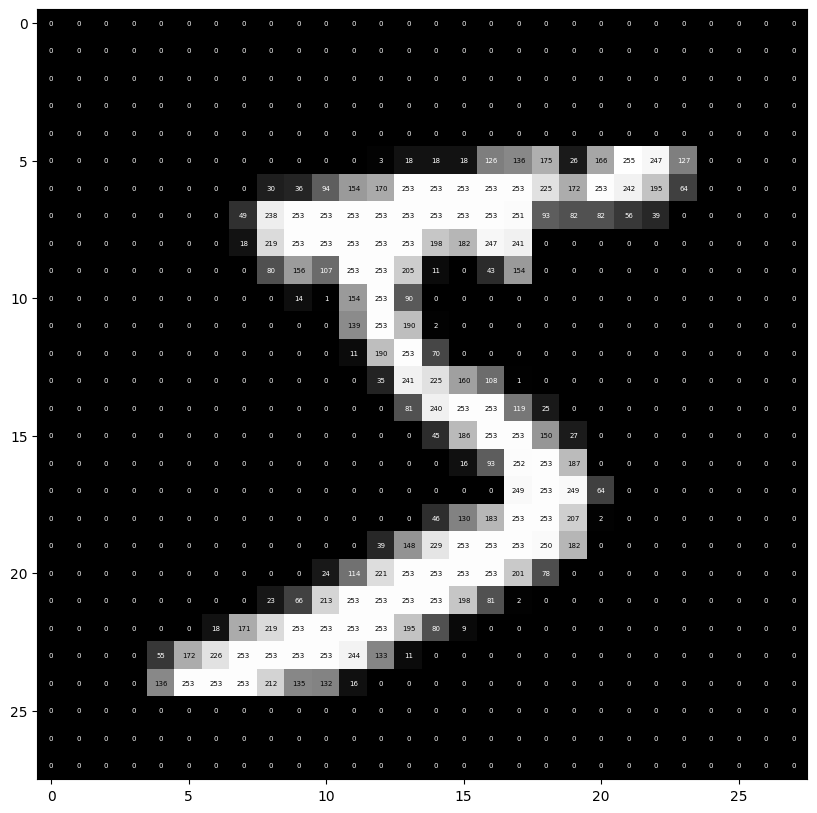

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(train_data.data[0], cmap='gray')

for i in range(train_data.data[0].shape[0]):
  for j in range(train_data.data[0].shape[1]):
    c = 1 if train_data.data[0][i,j].item() < 128 else 0
    ax.text(j, i, str(train_data.data[0][i,j].item()), color=(c,c,c,), ha="center", va="center", fontsize=5)

#plt.title("%i" % train_data.targets[0])
plt.show()


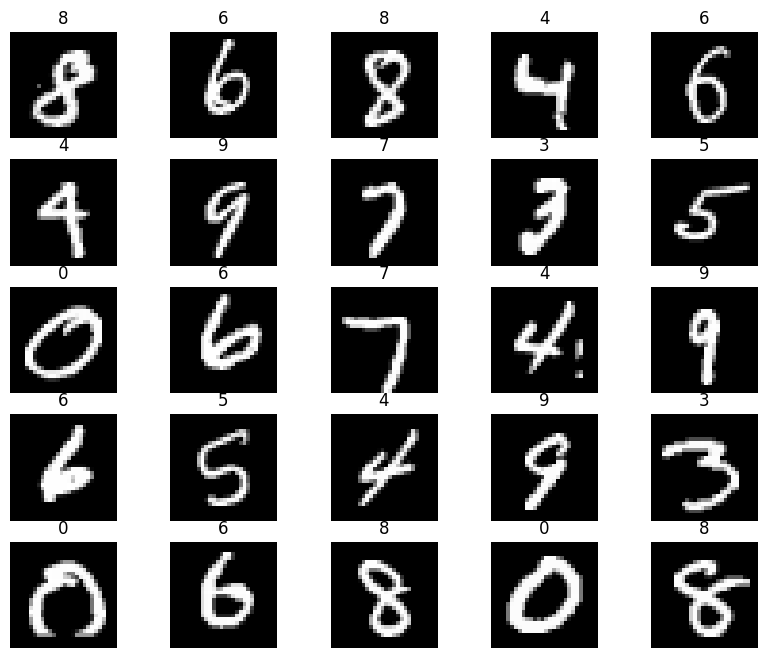

In [13]:
figure = plt.figure(figsize=(10,8))
cols, rows = 5,5
for i in range(1, cols*rows +1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [16]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
    'test' : torch.utils.data.DataLoader(test_data,
                                         batch_size=100,
                                         shuffle=True,
                                         num_workers=1)
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x79df0b13c160>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x79df0b13ee00>}

In [25]:
# CNN Model
class CNN(torch.nn.Module):

  def __init__(self):
      super(CNN, self).__init__()
      self.layer1 = torch.nn.Sequential(
          torch.nn.Conv2d(1,16,kernel_size=5, stride=1, padding=2), # 28 x 28 ==> 32 x 32 ==> 28 x 28
          torch.nn.ReLU(),
          torch.nn.MaxPool2d(kernel_size=2, stride=2))  # 28 x 28 ==> 14 x 14
      self.layer2 = torch.nn.Sequential(
          torch.nn.Conv2d(16,32, kernel_size=5, stride=1, padding=2), # 14 x 14 ==> 18 x 18 ==> 14 x 14
          torch.nn.ReLU(),
          torch.nn.MaxPool2d(kernel_size=2, stride=2)) # 14 x 14 ==> 7 x 7
      self.fc = torch.nn.Linear(32*7*7, 10, bias=True)
      torch.nn.init.xavier_uniform_(self.fc.weight)

  def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = out.view(out.size(0), -1)
      out = self.fc(out)
      return out


In [26]:
model = CNN()

In [27]:
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=10, bias=True)
)

In [29]:
learning_rate = 0.01
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
training_epochs = 10

In [33]:
# train my model
total_batch = len(loaders['train'])
for epoch in range(training_epochs):
  avg_cost = 0

  for X,Y in loaders['train']:
    optimizer.zero_grad()
    pred = model(X)
    cost = loss_func(pred, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('[Epoch: (:>4)] cost = (:>.9)'.format(epoch + 1, avg_cost))

print('Learning Finished!')

[Epoch: (:>4)] cost = (:>.9)
[Epoch: (:>4)] cost = (:>.9)
[Epoch: (:>4)] cost = (:>.9)
[Epoch: (:>4)] cost = (:>.9)
[Epoch: (:>4)] cost = (:>.9)
[Epoch: (:>4)] cost = (:>.9)
[Epoch: (:>4)] cost = (:>.9)
[Epoch: (:>4)] cost = (:>.9)
[Epoch: (:>4)] cost = (:>.9)
[Epoch: (:>4)] cost = (:>.9)
Learning Finished!


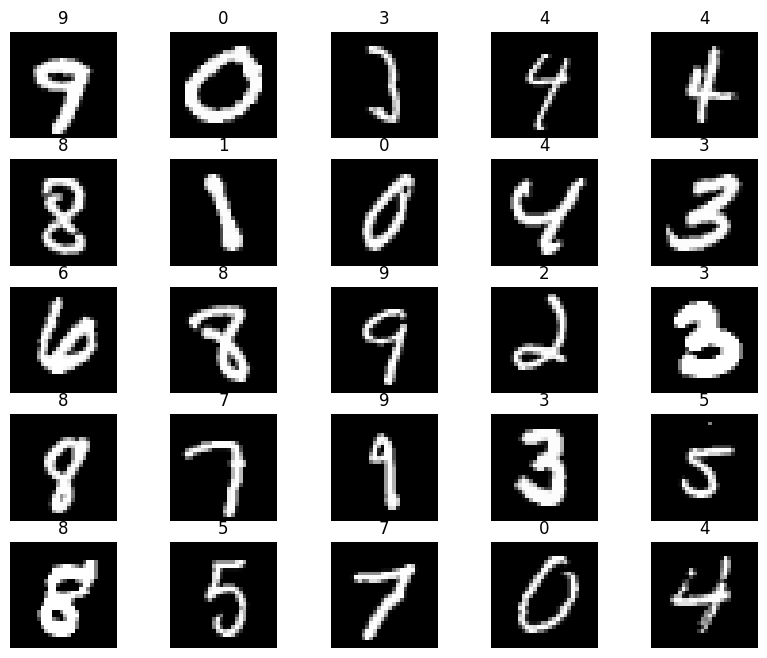

In [34]:
model.eval()
figure = plt.figure(figsize=(10,8))
cols, rows = 5,5
for i in range(1, cols*rows +1):
  sample_idx = torch.randint(len(test_data), size=(1,)).item()
  test_output = model(torch.unsqueeze(loaders['test'].dataset[sample_idx][0],dim=0))
  label = torch.argmax(test_output)
  figure.add_subplot(rows,cols, i)
  plt.title(label.numpy())
  plt.axis("off")
  plt.imshow(loaders['test'].dataset[sample_idx][0].squeeze().detach().numpy(),cmap="gray")

plt.show()